In [6]:
!uv pip install langchain-experimental

Using Python 3.13.3 environment at: C:\code\AiAgents\Talk2SQL\backend\.venv
Resolved 47 packages in 5.42s
Installed 1 package in 256ms
 + langchain-experimental==0.3.4


In [11]:
from langchain_experimental.utilities import PythonREPL

repl = PythonREPL()


Python REPL can execute arbitrary code. Use with caution.


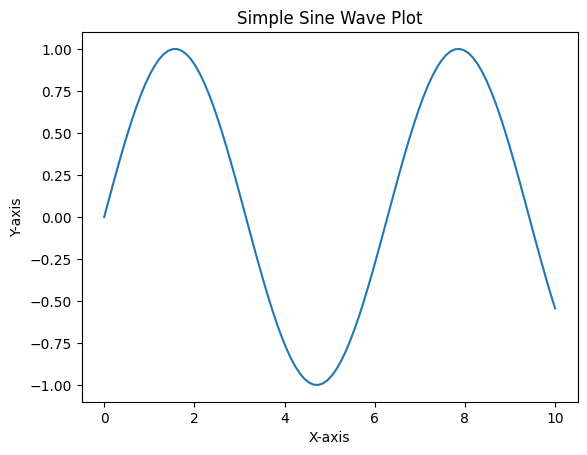

''

In [12]:
repl.run("""import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)  # 100 evenly spaced points from 0 to 10
y = np.sin(x)  # Calculate the sine of each x value

# Create the plot
plt.plot(x, y)

# Add labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Simple Sine Wave Plot")

# Display the plot
plt.show()""")

In [11]:
import sys
sys.prefix

'c:\\code\\AiAgents\\Talk2SQL\\backend\\.venv'

In [19]:
!uv pip install langchain-sandbox

Using Python 3.13.3 environment at: C:\code\AiAgents\Talk2SQL\backend\.venv
Resolved 32 packages in 2.15s
Installed 1 package in 116ms
 + langchain-sandbox==0.0.6


In [2]:
import os
from langchain_sandbox import PyodideSandbox

# 1. Define the absolute path where Deno was installed
# **CRITICAL: Replace 'hp' with your actual Windows username if different**
DENO_BIN_PATH = r"C:\Users\hp\.deno\bin"

# 2. Prepend Deno's path to the current process's PATH environment variable
# This ensures subprocess.run can find 'deno'
os.environ['PATH'] = f"{DENO_BIN_PATH};{os.environ['PATH']}"

# 3. Now initialize the sandbox
try:
    print(f"Attempting to initialize sandbox with Deno path: {DENO_BIN_PATH}")
    sandbox = PyodideSandbox(allow_net=True)
    print("PyodideSandbox initialized successfully!")
    
    # Continue with your agent setup here...
    
except Exception as e:
    print(f"Initialization Failed: {e}")

Attempting to initialize sandbox with Deno path: C:\Users\hp\.deno\bin
PyodideSandbox initialized successfully!


In [9]:
!uv pip install matplotlib

Using Python 3.13.3 environment at: C:\code\AiAgents\Talk2SQL\backend\.venv
Resolved 11 packages in 1.55s
Prepared 4 packages in 9.26s
Installed 6 packages in 1.18s
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.7
 + pyparsing==3.2.5


In [10]:
import matplotlib.pyplot as plt

c:\code\AiAgents\Talk2SQL\backend\.venv\Lib\site-packages\numpy\dtypes.py:30: RuntimeWarning: coroutine 'main' was never awaited
  def _add_dtype_helper(DType, alias):


In [13]:
from langchain_sandbox import PyodideSandbox
from langchain_core.tools import Tool
import matplotlib.pyplot as plt # Still needed for the path to the script
import numpy as np # Still needed for the path to the script

# 1. Instantiate the Sandbox
# This will run synchronously and check for Deno
sandbox = PyodideSandbox(allow_net=True)

# 2. Create the Tool
sandbox_tool = Tool(
    name="python_sandbox",
    description="A secure Python sandbox for executing code, especially for calculations and plotting data. Use print() to output results. When creating plots with matplotlib, make sure to save them to a file (e.g., plt.savefig('plot.png')) as plt.show() will not work.",
    func=sandbox.execute
)

# 3. Define the code to run (with plt.savefig)
code_to_run = """
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot and save it to a file
plt.plot(x, y)
plt.savefig("sine_wave_plot.png") # USE SAVEFIG
print("Plot saved to sine_wave_plot.png")
"""

# 4. Await the execution (ONLY WORKS IN JUPYTER/IPYTHON)
# We use .arun() which is the asynchronous version, and await it.
result = await sandbox_tool.arun(code_to_run)
print("Sandbox Result:", result)

Sandbox Result: <coroutine object PyodideSandbox.execute at 0x0000025559C0F940>


C:\Users\hp\AppData\Local\Temp\ipykernel_10356\1002229643.py:34: RuntimeWarning: coroutine 'PyodideSandbox.execute' was never awaited
  result = await sandbox_tool.arun(code_to_run)
